In [1]:
!pip install tensorflow opencv-python mediapipe matplotlib scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## Detect Face hand and pose

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CfONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
    

In [5]:
def draw_landmarks(image, results):
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS, 
    #                          mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    #                          mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
    #                          ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
# mp_drawing.draw_landmarks??

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
                                            
        if results.right_hand_landmarks:
            print("Right Hand")
            print(results.right_hand_landmarks)
        if results.left_hand_landmarks:
            print("Left Hand")
            print(results.left_hand_landmarks)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1732635222.822769 11651336 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1732635222.890112 11652690 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732635222.899866 11652692 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732635222.902348 11652696 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732635222.903264 11652692 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1732635222.903393 11652689 inference_feedback_manager.cc:114] Feedback manager requires

Right Hand
landmark {
  x: 0.22583738
  y: 1.02854347
  z: 3.41802178e-07
}
landmark {
  x: 0.288276404
  y: 0.968943
  z: -0.0264735091
}
landmark {
  x: 0.336077332
  y: 0.859772325
  z: -0.0351019427
}
landmark {
  x: 0.345201731
  y: 0.764638245
  z: -0.0438567661
}
landmark {
  x: 0.344402015
  y: 0.676475
  z: -0.0498658083
}
landmark {
  x: 0.315807909
  y: 0.654963613
  z: 0.00680658547
}
landmark {
  x: 0.333788753
  y: 0.534746826
  z: -0.0125659378
}
landmark {
  x: 0.350209415
  y: 0.470252216
  z: -0.0333496556
}
landmark {
  x: 0.368646145
  y: 0.41778326
  z: -0.0473640598
}
landmark {
  x: 0.276001036
  y: 0.637477756
  z: 0.00358837331
}
landmark {
  x: 0.293556958
  y: 0.499585748
  z: -0.015038006
}
landmark {
  x: 0.316743195
  y: 0.438191414
  z: -0.0338353701
}
landmark {
  x: 0.346356
  y: 0.39745608
  z: -0.0455692448
}
landmark {
  x: 0.234023631
  y: 0.645224392
  z: -0.00586514408
}
landmark {
  x: 0.247964099
  y: 0.50965184
  z: -0.0300126635
}
landmark {
 

In [10]:
draw_landmarks(frame, results)

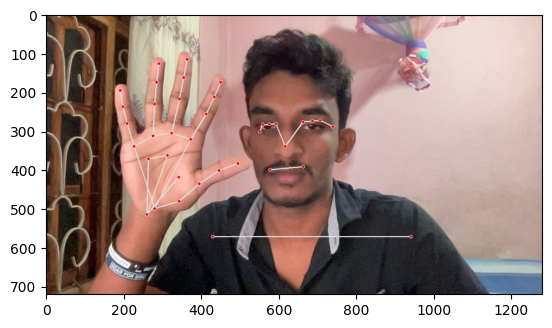

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [12]:
# print(len(results.left_hand_landmarks.landmark))
# frame

## Extacting landmark

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose

[array([ 0.50805104,  0.34815651, -1.34000063,  0.99996758]),
 array([ 0.53899235,  0.25598851, -1.27965057,  0.9999547 ]),
 array([ 0.55773145,  0.2497527 , -1.27965713,  0.9999516 ]),
 array([ 0.57407057,  0.24473231, -1.27930999,  0.99994731]),
 array([ 0.48583356,  0.26785576, -1.28638089,  0.99993664]),
 array([ 0.4691802 ,  0.26917034, -1.28619194,  0.99991304]),
 array([ 0.45297021,  0.2705034 , -1.2865262 ,  0.99989527]),
 array([ 0.59926432,  0.25915277, -0.85579407,  0.99994922]),
 array([ 0.43596774,  0.2846778 , -0.86205828,  0.99994427]),
 array([ 0.54321605,  0.42903721, -1.16955447,  0.9999671 ]),
 array([ 0.4818407 ,  0.43777826, -1.17786109,  0.99996787]),
 array([ 0.71039337,  0.6753388 , -0.53309727,  0.99942321]),
 array([ 0.32645357,  0.63378632, -0.49638024,  0.99584681]),
 array([ 0.93511468,  1.11608231, -1.18031585,  0.91569054]),
 array([ 0.21017447,  1.04510593, -0.612804  ,  0.36209723]),
 array([ 0.80806512,  0.65540028, -2.03818727,  0.94344574]),
 array([

In [17]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [18]:
print(len(pose))
print(pose)
print(face)
print(lh)
print(rh)

132
[ 5.08051038e-01  3.48156512e-01 -1.34000063e+00  9.99967575e-01
  5.38992345e-01  2.55988508e-01 -1.27965057e+00  9.99954700e-01
  5.57731450e-01  2.49752700e-01 -1.27965713e+00  9.99951601e-01
  5.74070573e-01  2.44732305e-01 -1.27930999e+00  9.99947309e-01
  4.85833555e-01  2.67855763e-01 -1.28638089e+00  9.99936640e-01
  4.69180197e-01  2.69170344e-01 -1.28619194e+00  9.99913037e-01
  4.52970207e-01  2.70503402e-01 -1.28652620e+00  9.99895275e-01
  5.99264324e-01  2.59152770e-01 -8.55794072e-01  9.99949217e-01
  4.35967743e-01  2.84677804e-01 -8.62058282e-01  9.99944270e-01
  5.43216050e-01  4.29037213e-01 -1.16955447e+00  9.99967098e-01
  4.81840700e-01  4.37778264e-01 -1.17786109e+00  9.99967873e-01
  7.10393369e-01  6.75338805e-01 -5.33097267e-01  9.99423206e-01
  3.26453567e-01  6.33786321e-01 -4.96380240e-01  9.95846808e-01
  9.35114682e-01  1.11608231e+00 -1.18031585e+00  9.15690541e-01
  2.10174471e-01  1.04510593e+00 -6.12803996e-01  3.62097234e-01
  8.08065116e-01  6.5

In [19]:
# If flatten method not used, then shape is 2Dementional 
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]) if results.face_landmarks else np.zeros(1404)
face.shape

(468, 3)

In [20]:
# Landmark extract method
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [21]:
# get landmarks results
result_test = extract_keypoints(results)
len(result_test)

# np.save("left",result_test)
# np.load("left.npy")

1662

## Setup Folders for Collection to the Data Set

In [22]:
# Path for exported to the data as a numpy arrays
DATA_PATH = os.path.join('MP_Data1')

# Actions that we try to detect
actions = np.array(['hello',"thanks","i love you"])

# 30 videos worth of data
no_sequences= 30
# videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [25]:
for action in actions: 
    # dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(0 ,no_sequences): 
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

### Collecting Set Of Data 30x30x1662

## Collect Keypoint Values for Training and Testing

In [2]:
cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # Loop througn actions
    for action in actions:
        # Loop through sequence of videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
        
                # Read feed
                ret, frame = cap.read()
        
                # Make detections
                image, results = mediapipe_detection(frame, holistic)                                     
                # print(results)
                
                # Draw landmarks
                draw_styled_landmarks(image, results)

                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)

                
                # Get the landmarks results
                keypoints = extract_keypoints(results)
                print(keypoints)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

## Preprocess Data and Create Labels and Features

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'i love you': 2}

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(90, 30, 1662)

In [25]:
np.array(labels).shape

(90,)

In [27]:
X = np.array(sequences)
X.shape

(90, 30, 1662)

In [28]:
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [30]:
X_train.shape

(85, 30, 1662)

## Build and Train LSTM Nural Network

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [49]:
# monitor the training model accuracy and in-details
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [50]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
# model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu')) # return false beacuse next layer is Dense layer
model.add(Dense(64, activation='relu')) # fully connected layer
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) # final layer have final set of outputs (actions.shape[0])

In [51]:
print(actions.shape[0])
print(X.shape)

3
(90, 30, 1662)


In [52]:
# example how to work it
res = [0.7,.02,0.1] # this results are given for each final layer actions. more posibility 0.7 then output pass for it.
np_res = np.argmax(res)
actions[np_res]

'hello'

In [53]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [54]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - categorical_accuracy: 0.4129 - loss: 1.4288
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.3541 - loss: 2.3141
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - categorical_accuracy: 0.4247 - loss: 7.6202
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3327 - loss: 8.4596
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - categorical_accuracy: 0.4383 - loss: 2.2023
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - categorical_accuracy: 0.2780 - loss: 3.2972
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - categorical_accuracy: 0.3405 - loss: 1.7174
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.1565 - loss: 1.9314
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - categorical_accuracy: 0.3190 - loss: 1.5062
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.3072 - loss: 1.3034
Epoch 11/1000
3/3 ━━━━━━━━━━━

KeyboardInterrupt: 

In [55]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

## Make Predictions

In [56]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


In [61]:
actions[np.argmax(res[1])]


'hello'

In [62]:
actions[np.argmax(y_test[1])]

'hello'

In [63]:
actions[(y_test[4])]

array(['hello', 'hello', 'thanks'], dtype='<U10')

# Evaluate Predictions

In [102]:
X_train.shape

(85, 30, 1662)

In [100]:
yhat = model.predict(X_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [94]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [95]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [96]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[56,  2],
        [ 0, 27]],

       [[56,  0],
        [ 0, 29]],

       [[56,  0],
        [ 2, 27]]])

In [97]:
accuracy_score(ytrue, yhat)

0.9764705882352941

## Save Weights

In [71]:
model.save("train_model.h5")

In [ ]:
# del model

In [ ]:
model.load_weights("train_model.h5")

# Test In real Time

In [113]:
actions[np.argmax(res)]

'i love you'

In [119]:
sequence = [] # use for feeed to the model get 30 frames in live
sentence = [] # model pass outputs are contacetane for sentance for used
threshold = 0.4


cap = cv2.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

         # Get the landmarks results
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]  # lastframse 30 for given predictions
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

         #3. Vizulization in real time
            if res[np.argmax(res)] > threshold: 
                if len(sentence) and actions[np.argmax(res)] != "i love you": 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Vizulization probabilities
            # image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('Real Time Sign Language Detector', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1725088389.640296 18555721 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2
W0000 00:00:1725088389.723235 18666563 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725088389.730985 18666564 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725088389.733261 18666568 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725088389.733267 18666564 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725088389.733539 18666565 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling su

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

IndexError: list index out of range